[View in Colaboratory](https://colab.research.google.com/github/vinitrg/Machine-Learning/blob/master/Poker_hand.ipynb)

In [0]:
import numpy as np
import sklearn as skt
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
columns = ["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5","CLASS"]
test_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data",names =columns)
train_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data", names = columns)

In [25]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


# Understanding DataSet by Descriptive Statistics
#Training Data :
train_data.head()
print("Shape:",train_data.shape)
print("Data types:", train_data.dtypes)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_data, 10))
print(train_data.describe())

('Shape:', (25010, 11))
('Data types:', S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
CLASS    int64
dtype: object)
Top Absolute Correlations
S3  S5    0.030305
S2  S3    0.029306
C1  C3    0.026285
C2  C3    0.024702
S1  S5    0.024167
    S2    0.021263
S2  S4    0.020960
S1  S3    0.019618
S4  S5    0.018200
S3  C3    0.017942
dtype: float64
                 S1            C1            S2            C2            S3  \
count  25010.000000  25010.000000  25010.000000  25010.000000  25010.000000   
mean       2.508756      6.995242      2.497721      7.014194      2.510236   
std        1.116483      3.749805      1.121767      3.766974      1.123148   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      4.000000      1.000000      4.000000      2.000000   
50%        3.000000      7.000000      2.000000      7.000000      3.000000

In [26]:
print(train_data["C1"].describe())

print(train_data["C1"].value_counts())


count    25010.000000
mean         6.995242
std          3.749805
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         13.000000
Name: C1, dtype: float64
1     1982
9     1967
7     1961
8     1948
2     1941
12    1940
11    1926
4     1919
13    1915
5     1892
3     1882
10    1877
6     1860
Name: C1, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f335189f350>,
      dtype=object)

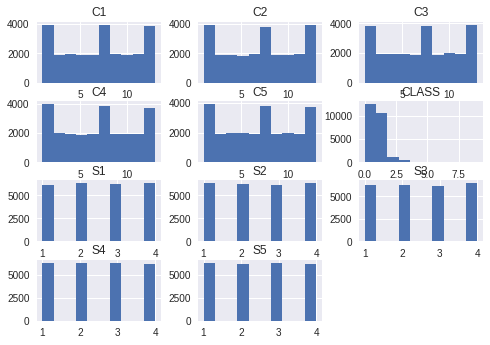

In [9]:
#Understanding Data with Visualisation 
import seaborn as sns
train_data.hist()

In [6]:
from sklearn.preprocessing import StandardScaler
array = train_data.values
X = array[:,0:10]
Y = array[:,10]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

np.set_printoptions(precision=3)
print(rescaledX[0:5,:])
print(train_data.head())

[[-1.351  0.801 -1.335  1.058 -1.345  1.598 -1.34   1.35  -1.338 -1.594]
 [-0.456  1.068 -0.444  1.589 -0.454  0.797 -0.444  1.35  -0.445 -1.594]
 [ 0.44   1.335  0.448  1.058  0.436  1.598  0.452  0.816  0.449 -1.594]
 [ 1.336  0.801  1.339  1.058  1.326 -1.606  1.348  1.617  1.343  1.346]
 [ 1.336 -1.599  1.339  1.589  1.326  1.331  1.348  1.083  1.343  0.812]]
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0   1  10   1  11   1  13   1  12   1   1      9
1   2  11   2  13   2  10   2  12   2   1      9
2   3  12   3  11   3  13   3  10   3   1      9
3   4  10   4  11   4   1   4  13   4  12      9
4   4   1   4  13   4  12   4  11   4  10      9


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X = array[:,0:10]
Y = array[:,10]

kfold = KFold(n_splits=50)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("50-fold Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

kfold = KFold(n_splits=15, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("15-fold Accuracy: ",results.mean()*100.0, results.std()*100)

kfold = KFold(n_splits=5, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(" 5-fold Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

kfold = KFold(n_splits=3, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(" 3-fold Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)
print(results)

50-fold Accuracy: 49.952% (2.344%)
[0.491 0.489 0.492 0.504 0.502 0.488 0.512 0.51  0.51  0.505 0.485 0.499
 0.502 0.5   0.502]
('15-fold Accuracy: ', 49.9520959117529, 0.8378231154137014)
[0.491 0.498 0.511 0.496 0.501]
 5-fold Accuracy: 49.948% (0.679%)
 3-fold Accuracy: 49.952% (0.417%)
[0.496 0.505 0.497]
